In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

FILEMAP = {
    # ───── A ─────
    'ADA'  : r'../resources/data/raw/ADA_USDT_1m.csv',
    'ALGO' : r'../resources/data/raw/ALGO_USDT_1m.csv',
    'ANKR' : r'../resources/data/raw/ANKR_USDT_1m.csv',
    'ATOM' : r'../resources/data/raw/ATOM_USDT_1m.csv',
    # ───── B ─────
    'BAT'  : r'../resources/data/raw/BAT_USDT_1m.csv',
    'BNB'  : r'../resources/data/raw/BNB_USDT_1m.csv',
    'BTC'  : r'../resources/data/raw/BTC_USDT_1m.csv',
    # ───── C ─────
    'CELR' : r'../resources/data/raw/CELR_USDT_1m.csv',
    'CHZ'  : r'../resources/data/raw/CHZ_USDT_1m.csv',
    'COS'  : r'../resources/data/raw/COS_USDT_1m.csv',
    'CVC'  : r'../resources/data/raw/CVC_USDT_1m.csv',
    # ───── D ─────
    'DASH' : r'../resources/data/raw/DASH_USDT_1m.csv',
    'DENT' : r'../resources/data/raw/DENT_USDT_1m.csv',
    'DOCK' : r'../resources/data/raw/DOCK_USDT_1m.csv',
    'DOGE' : r'../resources/data/raw/DOGE_USDT_1m.csv',
    'DUSK' : r'../resources/data/raw/DUSK_USDT_1m.csv',
    # ───── E ─────
    'ENJ'  : r'../resources/data/raw/ENJ_USDT_1m.csv',
    'EOS'  : r'../resources/data/raw/EOS_USDT_1m.csv',
    'ETC'  : r'../resources/data/raw/ETC_USDT_1m.csv',
    'ETH'  : r'../resources/data/raw/ETH_USDT_1m.csv',
    # ───── F ─────
    'FET'  : r'../resources/data/raw/FET_USDT_1m.csv',
    'FTM'  : r'../resources/data/raw/FTM_USDT_1m.csv',
    'FUN'  : r'../resources/data/raw/FUN_USDT_1m.csv',
    # ───── H ─────
    'HOT'  : r'../resources/data/raw/HOT_USDT_1m.csv',
    # ───── I ─────
    'ICX'  : r'../resources/data/raw/ICX_USDT_1m.csv',
    'IOST' : r'../resources/data/raw/IOST_USDT_1m.csv',
    'IOTA' : r'../resources/data/raw/IOTA_USDT_1m.csv',
    # ───── K ─────
    'KEY'  : r'../resources/data/raw/KEY_USDT_1m.csv',
    # ───── L ─────
    'LINK' : r'../resources/data/raw/LINK_USDT_1m.csv',
    'LTC'  : r'../resources/data/raw/LTC_USDT_1m.csv',
    # ───── M ─────
    'MATIC': r'../resources/data/raw/MATIC_USDT_1m.csv',
    'MTL'  : r'../resources/data/raw/MTL_USDT_1m.csv',
    # ───── N ─────
    'NEO'  : r'../resources/data/raw/NEO_USDT_1m.csv',
    'NULS' : r'../resources/data/raw/NULS_USDT_1m.csv',
    # ───── O ─────
    'OMG'  : r'../resources/data/raw/OMG_USDT_1m.csv',
    'ONE'  : r'../resources/data/raw/ONE_USDT_1m.csv',
    'ONG'  : r'../resources/data/raw/ONG_USDT_1m.csv',
    'ONT'  : r'../resources/data/raw/ONT_USDT_1m.csv',
    # ───── P ─────
    'PERL' : r'../resources/data/raw/PERL_USDT_1m.csv',
    # ───── Q ─────
    'QTUM' : r'../resources/data/raw/QTUM_USDT_1m.csv',
    # ───── T ─────
    'TFUEL': r'../resources/data/raw/TFUEL_USDT_1m.csv',
    'THETA': r'../resources/data/raw/THETA_USDT_1m.csv',
    'TOMO' : r'../resources/data/raw/TOMO_USDT_1m.csv',
    'TRX'  : r'../resources/data/raw/TRX_USDT_1m.csv',
    'TUSD' : r'../resources/data/raw/TUSD_USDT_1m.csv',
    # ───── U ─────
    'USDC' : r'../resources/data/raw/USDC_USDT_1m.csv',
    # ───── V ─────
    'VET'  : r'../resources/data/raw/VET_USDT_1m.csv',
    # ───── W ─────
    'WAN'  : r'../resources/data/raw/WAN_USDT_1m.csv',
    'WAVES': r'../resources/data/raw/WAVES_USDT_1m.csv',
    'WIN'  : r'../resources/data/raw/WIN_USDT_1m.csv',
    # ───── X ─────
    'XLM'  : r'../resources/data/raw/XLM_USDT_1m.csv',
    'XMR'  : r'../resources/data/raw/XMR_USDT_1m.csv',
    'XRP'  : r'../resources/data/raw/XRP_USDT_1m.csv',
    # ───── Z ─────
    'ZEC'  : r'../resources/data/raw/ZEC_USDT_1m.csv',
    'ZIL'  : r'../resources/data/raw/ZIL_USDT_1m.csv',
    'ZRX'  : r'../resources/data/raw/ZRX_USDT_1m.csv',
}

COL_PRICE    = 'close'      # ценовата колона в CSV-то
TIMEZONE     = 'UTC'        # всички в UTC
RISK_FREE    = 0.00         # годишен r_f; 0.0 ако не ти трябва
WEIGHT_CAP   = 0.50         # ≤ 50 % в един актив
N_PORTFOLIOS = 25_000       # Монте Карло проби
SEED         = 42
TEST_FRAC = 0.20          # 20 % test
np.random.seed(SEED)

# --- 1-минутни барове → 525 600 на година ----------------------------
BAR_SEC           = 60
PERIODS_PER_YEAR  = int(365 * 86_400 / BAR_SEC) 
print(f'periods_per_year = {PERIODS_PER_YEAR:,}')

periods_per_year = 525,600


In [2]:
# ╔═════════════════════════════════════════════════════════════╗
# ║ 1) Зареждане на минутните цени                              ║
# ╚═════════════════════════════════════════════════════════════╝
def load_iso_csv(path: str | Path,
                 price_col: str = COL_PRICE,
                 tz: str = TIMEZONE) -> pd.Series:
    """
    Чете CSV с ISO `timestamp` и връща Series<price> (tz-aware).
    """
    df = pd.read_csv(path,
                     parse_dates=['timestamp'],
                     index_col='timestamp')
    df.index = df.index.tz_localize(tz)
    return df[price_col].astype(float)


# --- комбинираме всички активи ----------------------------------------
prices = pd.concat(
    {tkr: load_iso_csv(p) for tkr, p in FILEMAP.items()},
    axis=1, join='inner').sort_index()

# 2) намираме cut-off timestamp
cut_idx   = int(len(prices) * (1 - TEST_FRAC))
cut_date  = prices.index[cut_idx]          # tz-aware
print(f'🔪 Cut date (80/20 split) → {cut_date}')

# 3) правим две отделни рамки
train_prices = prices.loc[:cut_date]
test_prices  = prices.loc[cut_date + pd.Timedelta(minutes=1):]   # +1 мин. за да не дублираме

assert train_prices.index.max() < test_prices.index.min()
print(train_prices.shape, test_prices.shape)

🔪 Cut date (80/20 split) → 2023-10-18 09:39:00+00:00
(188482, 56) (47120, 56)


In [3]:
# ╔═════════════════════════════════════════════════════════════╗
# ║ 2) Минутни доходности, μ̅, Σ                                ║
# ╚═════════════════════════════════════════════════════════════╝
train_rets = train_prices.pct_change().dropna()

# проверка, че са 1-минутни
freq = train_rets.index.to_series().diff().dt.total_seconds().median()
assert freq == BAR_SEC, f'Открих {freq=} сек. – не е 1-мин серия!'

means_bar = train_rets.mean().values                  # μ_i  (за 1 бар)
cov_bar   = train_rets.cov().values                  # Σ    (за 1 бар)
tickers   = list(FILEMAP.keys())

# кратка статистика
stats = pd.DataFrame({'μ_bar': means_bar,
                      'σ_bar': train_rets.std(ddof=0).values},
                     index=tickers)
stats['Sharpe_bar'] = stats['μ_bar'] / stats['σ_bar']
display(stats)


,μ_bar,σ_bar,Sharpe_bar
ADA,-9.595675e-07,0.000897,-0.001070
ALGO,-1.083596e-06,0.001088,-0.000996
ANKR,-3.407354e-07,0.001087,-0.000313
ATOM,-1.683887e-06,0.000779,-0.002163
BAT,-1.048045e-07,0.000895,-0.000117
BNB,-8.616811e-07,0.000657,-0.001312
BTC,4.939612e-07,0.000491,0.001007
CELR,-1.192590e-06,0.001099,-0.001085
CHZ,-1.509766e-06,0.001222,-0.001236
COS,-6.354701e-08,0.001349,-0.000047


In [4]:
# ╔═════════════════════════════════════════════════════════════╗
# ║ 3) Монте-Карло портфейли (с ограничение на теглото)         ║
# ╚═════════════════════════════════════════════════════════════╝
n_assets = len(tickers)
results  = np.zeros((3, N_PORTFOLIOS))          # σ, μ, Sharpe
weights  = np.zeros((N_PORTFOLIOS, n_assets))

i = 0
while i < N_PORTFOLIOS:
    w = np.random.random(n_assets)
    w /= w.sum()
    if (w > WEIGHT_CAP).any():          # концентрационен лимит
        continue

    mu_bar  = np.dot(w, means_bar)
    sig_bar = np.sqrt(w @ cov_bar @ w)

    mu_ann  = mu_bar  * PERIODS_PER_YEAR
    sig_ann = sig_bar * np.sqrt(PERIODS_PER_YEAR)

    weights[i]   = w
    results[0,i] = sig_ann
    results[1,i] = mu_ann
    results[2,i] = (mu_ann - RISK_FREE) / sig_ann

    i += 1

idx_max_sharpe = results[2].argmax()
idx_min_vol    = results[0].argmin()


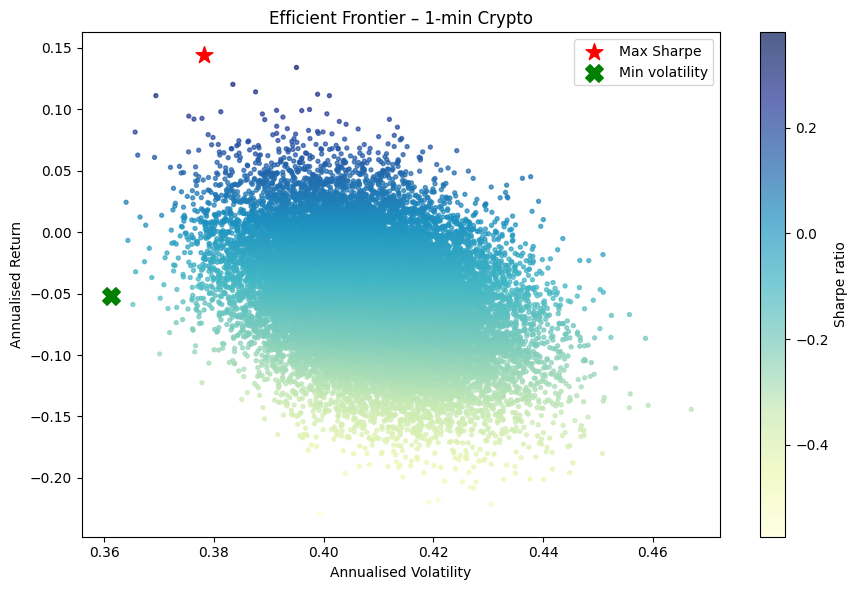

In [5]:
# ╔═════════════════════════════════════════════════════════════╗
# ║ 4) Графика: Efficient Frontier                             ║
# ╚═════════════════════════════════════════════════════════════╝
fig, ax = plt.subplots(figsize=(9, 6))
sc = ax.scatter(results[0], results[1],
                c=results[2], cmap='YlGnBu', s=8, alpha=0.7)
fig.colorbar(sc, label='Sharpe ratio')

ax.scatter(*results[:2, idx_max_sharpe],
           marker='*', s=160, color='r', label='Max Sharpe')
ax.scatter(*results[:2, idx_min_vol],
           marker='X', s=160, color='g', label='Min volatility')

ax.set(title='Efficient Frontier – 1-min Crypto',
       xlabel='Annualised Volatility',
       ylabel='Annualised Return')
ax.legend(); plt.tight_layout()


In [16]:
# ╔═════════════════════════════════════════════════════════════╗
# ║ 5) Показване на разпределенията                             ║
# ╚═════════════════════════════════════════════════════════════╝
alloc_max = pd.Series(weights[idx_max_sharpe], index=tickers).round(2)
alloc_min = pd.Series(weights[idx_min_vol   ], index=tickers).round(2)

print('\n' + '─'*70)
print('ПОРТФЕЙЛ С МАКС. SHARPE')
print(f"  Год. доходност : {results[1, idx_max_sharpe]:.2%}")
print(f"  Год. волатилност : {results[0, idx_max_sharpe]:.2%}\n")
display(alloc_max.to_frame('Weight').T)

print('\n' + '─'*70)
print('ПОРТФЕЙЛ С МИН. ВОЛАТИЛНОСТ')
print(f"  Год. доходност : {results[1, idx_min_vol]:.2%}")
print(f"  Год. волатилност : {results[0, idx_min_vol]:.2%}\n")
display(alloc_min.to_frame('Weight').T)
print('max')
print(alloc_max.to_dict())
print('min')
print(alloc_min.to_dict())



──────────────────────────────────────────────────────────────────────
ПОРТФЕЙЛ С МАКС. SHARPE
  Год. доходност : 14.40%
  Год. волатилност : 37.82%



,ADA,ALGO,ANKR,ATOM,BAT,BNB,BTC,CELR,CHZ,COS,...,VET,WAN,WAVES,WIN,XLM,XMR,XRP,ZEC,ZIL,ZRX
Weight,0.0,0.02,0.02,0.03,0.03,0.02,0.02,0.01,0.01,0.01,...,0.03,0.03,0.03,0.02,0.03,0.03,0.01,0.01,0.02,0.03



──────────────────────────────────────────────────────────────────────
ПОРТФЕЙЛ С МИН. ВОЛАТИЛНОСТ
  Год. доходност : -5.24%
  Год. волатилност : 36.12%



,ADA,ALGO,ANKR,ATOM,BAT,BNB,BTC,CELR,CHZ,COS,...,VET,WAN,WAVES,WIN,XLM,XMR,XRP,ZEC,ZIL,ZRX
Weight,0.01,0.02,0.0,0.03,0.02,0.04,0.02,0.03,0.03,0.01,...,0.0,0.0,0.0,0.04,0.01,0.03,0.02,0.0,0.03,0.03


max
{'ADA': 0.0, 'ALGO': 0.02, 'ANKR': 0.02, 'ATOM': 0.03, 'BAT': 0.03, 'BNB': 0.02, 'BTC': 0.02, 'CELR': 0.01, 'CHZ': 0.01, 'COS': 0.01, 'CVC': 0.03, 'DASH': 0.0, 'DENT': 0.01, 'DOCK': 0.02, 'DOGE': 0.02, 'DUSK': 0.0, 'ENJ': 0.01, 'EOS': 0.01, 'ETC': 0.0, 'ETH': 0.0, 'FET': 0.02, 'FTM': 0.0, 'FUN': 0.01, 'HOT': 0.02, 'ICX': 0.0, 'IOST': 0.01, 'IOTA': 0.0, 'KEY': 0.02, 'LINK': 0.03, 'LTC': 0.0, 'MATIC': 0.01, 'MTL': 0.03, 'NEO': 0.0, 'NULS': 0.03, 'OMG': 0.01, 'ONE': 0.02, 'ONG': 0.03, 'ONT': 0.03, 'PERL': 0.03, 'QTUM': 0.03, 'TFUEL': 0.01, 'THETA': 0.01, 'TOMO': 0.03, 'TRX': 0.03, 'TUSD': 0.03, 'USDC': 0.03, 'VET': 0.03, 'WAN': 0.03, 'WAVES': 0.03, 'WIN': 0.02, 'XLM': 0.03, 'XMR': 0.03, 'XRP': 0.01, 'ZEC': 0.01, 'ZIL': 0.02, 'ZRX': 0.03}
min
{'ADA': 0.01, 'ALGO': 0.02, 'ANKR': 0.0, 'ATOM': 0.03, 'BAT': 0.02, 'BNB': 0.04, 'BTC': 0.02, 'CELR': 0.03, 'CHZ': 0.03, 'COS': 0.01, 'CVC': 0.02, 'DASH': 0.02, 'DENT': 0.01, 'DOCK': 0.04, 'DOGE': 0.01, 'DUSK': 0.0, 'ENJ': 0.01, 'EOS': 0.02, 'ETC'

In [7]:
# ╔═════════════════════════════════════════════════════════════╗
# ║ 6) Генетичен алгоритъм – оптимизация на Sharpe              ║
# ╚═════════════════════════════════════════════════════════════╝
import random

# --------------------------------------------------------------
# Хиперпараметри на GA
# --------------------------------------------------------------
POP_SIZE       = 1000          # колко индивида във всяко поколение
NB_GENERATIONS = 50             # колко поколения
ELITE_FRAC     = 0.10           # най-добрият % индивиди, които копираме директно
MUTATE_FRAC    = 0.15           # шанс дадено дете да бъде мутант
MUTATE_SCALE   = 0.10           # колко силно „рита“ мутантът теглото
PLOT_X = 5
PLOT_Y = 5


np.random.seed(123)

# --------------------------------------------------------------
# Фитнес функция – годишен Sharpe
# --------------------------------------------------------------
def fitness(w: np.ndarray) -> float:
    """
    w трябва вече да е нормализиран: Σ w_i = 1
    """
    mu_bar  = w @ means_bar
    sig_bar = np.sqrt(w @ cov_bar @ w)
    
    mu_ann  = mu_bar  * PERIODS_PER_YEAR
    sig_ann = sig_bar * np.sqrt(PERIODS_PER_YEAR)
    return (mu_ann - RISK_FREE) / sig_ann


# --------------------------------------------------------------
# GA инструменти: кросоувър, мутация, създаване на поколение
# --------------------------------------------------------------
def crossover(p1: np.ndarray, p2: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Симпъл α-crossover (α ~ U[0,1])
    """
    α = np.random.rand()
    c1 = α * p1 + (1 - α) * p2
    c2 = (1 - α) * p1 + α * p2
    return c1, c2

def mutate(child: np.ndarray) -> np.ndarray:
    """
    Избутва случайно тегло с N(0, MUTATE_SCALE).
    После нормализира и реже до WEIGHT_CAP.
    """
    idx = np.random.randint(len(child))
    child[idx] += np.random.normal(0, MUTATE_SCALE)
    child = np.clip(child, 0, WEIGHT_CAP)      # защитно изрязване
    child /= child.sum()
    return child

def next_generation(pop: list[np.ndarray]) -> list[np.ndarray]:
    """
    Създава следващото поколение:
      1. сортира по fitness (низходящ)
      2. взема ELITE_FRAC като “елит”
      3. прави деца чрез кросоувър
      4. мутира част от децата
      5. нормализира теглата
    """
    pop = sorted(pop, key=fitness, reverse=True)
    elite_n = int(len(pop) * ELITE_FRAC)
    new_pop = pop[:elite_n]                       # запазваме елита
    
    # ––– рандомизираме елита, за да правим случайни двойки
    random.shuffle(new_pop)
    parents = new_pop.copy()
    
    # ––– кросоувър
    children = []
    for p1, p2 in zip(parents[::2], parents[1::2]):
        c1, c2 = crossover(p1, p2)
        children.extend([c1, c2])
    
    # ––– мутации
    for k in range(len(children)):
        if np.random.rand() < MUTATE_FRAC:
            children[k] = mutate(children[k])
        # задължителна нормализация + cap
        children[k] = np.clip(children[k], 0, WEIGHT_CAP)
        children[k] /= children[k].sum()
    
    new_pop.extend(children)
    
    # ако популацията е недостатъчна (нечетен брой родители)
    while len(new_pop) < POP_SIZE:
        w = np.random.random(len(tickers))
        w /= w.sum()
        if (w > WEIGHT_CAP).any():
            continue
        new_pop.append(w)
    return new_pop[:POP_SIZE]


# hyperparameters optimizer
import numpy as np, random, math, optuna, time
from copy import deepcopy
def run_ga_once(pop_size, nb_generations, elite_frac,
                mutate_frac, mutate_scale,
                weight_cap, seed=None):
    """
    Стартира ЕДНО изпълнение на GA с подадените хиперпараметри.
    Връща Sharpe на най-добрия индивид.
    """

    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)

    # -------------- локални override-и на глобалните константи --------------
    global POP_SIZE, NB_GENERATIONS, ELITE_FRAC
    global MUTATE_FRAC, MUTATE_SCALE, WEIGHT_CAP

    POP_SIZE       = pop_size
    NB_GENERATIONS = nb_generations
    ELITE_FRAC     = elite_frac
    MUTATE_FRAC    = mutate_frac
    MUTATE_SCALE   = mutate_scale
    WEIGHT_CAP     = weight_cap          # нов параметър!

    # -------------- инициализираме първото поколение ------------------------
    population = []
    while len(population) < POP_SIZE:
        w = np.random.random(len(tickers))
        w /= w.sum()
        if (w > WEIGHT_CAP).any():
            continue
        population.append(w)

    # -------------- еволюираме ----------------------------------------------
    best_fit = -math.inf
    for g in range(NB_GENERATIONS):
        population = next_generation(population)
        # оценяваме елита
        top = max(population, key=fitness)
        best_fit = max(best_fit, fitness(top))

    return best_fit   # ↑ Sharpe на най-силния индивид

def objective(trial: optuna.trial.Trial) -> float:
    """
    Optuna ще пробва различни GA-хиперпараметри и ще
    връща >>средния<< Sharpe от K рестарта на GA.
    """
    # 1) дефинираме търсено пространство
    pop_size       = trial.suggest_int   ('pop_size',        200, 1500, step=100)
    nb_generations = trial.suggest_int   ('nb_generations',   20, 200,  step=10)
    elite_frac     = trial.suggest_float ('elite_frac',      0.05, 0.35)
    mutate_frac    = trial.suggest_float ('mutate_frac',     0.05, 0.40)
    mutate_scale   = trial.suggest_float ('mutate_scale',    0.01, 0.50, log=True)
    weight_cap     = trial.suggest_float ('weight_cap',      0.30, 0.70)

    # 2) за стабилност ‒ стартираме GA K пъти с разл. seed
    K, scores = 3, []
    for k in range(K):
        seed = 2024 + k
        score = run_ga_once(pop_size, nb_generations,
                            elite_frac, mutate_frac, mutate_scale,
                            weight_cap, seed=seed)
        scores.append(score)

    # 3) Optuna максимизира -> връщаме средната стойност
    return float(np.mean(scores))

study = optuna.create_study(direction="maximize",
                            sampler=optuna.samplers.TPESampler(),
                            pruner =optuna.pruners.MedianPruner(
                                        n_startup_trials=10, n_warmup_steps=5))
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
study.optimize(objective,
               n_trials = 40,          # или по време: timeout=3600
               show_progress_bar=True)

print("🏆 Най-добрите GA-хиперпараметри:")
for k, v in study.best_trial.params.items():
    print(f"  {k:15s} : {v}")
print("Среден Sharpe  :", study.best_value)




/home/npenchev/fun/summer-school-2025-crypto-forecasting/.venv/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-06-28 21:16:26,759] A new study created in memory with name: no-name-a2204eec-c20e-4db7-aef4-0c2d21d27e8c
Best trial: 0. Best value: 1.07649:   2%|█                                           | 1/40 [00:04<03:12,  4.94s/it]

[I 2025-06-28 21:16:31,704] Trial 0 finished with value: 1.0764853558160654 and parameters: {'pop_size': 300, 'nb_generations': 190, 'elite_frac': 0.32678238108547886, 'mutate_frac': 0.10604775510899492, 'mutate_scale': 0.012989978985879842, 'weight_cap': 0.323174310990067}. Best is trial 0 with value: 1.0764853558160654.


Best trial: 0. Best value: 1.07649:   5%|██▏                                         | 2/40 [00:05<01:40,  2.65s/it]

[I 2025-06-28 21:16:32,740] Trial 1 finished with value: 0.43456657006906996 and parameters: {'pop_size': 500, 'nb_generations': 20, 'elite_frac': 0.202946103463935, 'mutate_frac': 0.32096685982367446, 'mutate_scale': 0.02259056821114421, 'weight_cap': 0.32756946164273804}. Best is trial 0 with value: 1.0764853558160654.


Best trial: 0. Best value: 1.07649:   8%|███▎                                        | 3/40 [00:18<04:22,  7.10s/it]

[I 2025-06-28 21:16:45,136] Trial 2 finished with value: 0.7315209753920738 and parameters: {'pop_size': 1200, 'nb_generations': 120, 'elite_frac': 0.07978867685807359, 'mutate_frac': 0.1065924048718043, 'mutate_scale': 0.011658521917474752, 'weight_cap': 0.36199669152013575}. Best is trial 0 with value: 1.0764853558160654.


Best trial: 0. Best value: 1.07649:  10%|████▍                                       | 4/40 [00:22<03:30,  5.86s/it]

[I 2025-06-28 21:16:49,095] Trial 3 finished with value: 0.548596915043826 and parameters: {'pop_size': 1000, 'nb_generations': 40, 'elite_frac': 0.10761557326716012, 'mutate_frac': 0.3848159270679198, 'mutate_scale': 0.012477910632124355, 'weight_cap': 0.4377414979993248}. Best is trial 0 with value: 1.0764853558160654.


Best trial: 4. Best value: 1.83336:  12%|█████▌                                      | 5/40 [00:25<02:49,  4.85s/it]

[I 2025-06-28 21:16:52,162] Trial 4 finished with value: 1.833363067250362 and parameters: {'pop_size': 200, 'nb_generations': 170, 'elite_frac': 0.16261249976741884, 'mutate_frac': 0.27432462849848654, 'mutate_scale': 0.0861445141941049, 'weight_cap': 0.3619738620177759}. Best is trial 4 with value: 1.833363067250362.


Best trial: 4. Best value: 1.83336:  15%|██████▌                                     | 6/40 [00:30<02:53,  5.10s/it]

[I 2025-06-28 21:16:57,740] Trial 5 finished with value: 1.5755275776686244 and parameters: {'pop_size': 500, 'nb_generations': 120, 'elite_frac': 0.14236579298716923, 'mutate_frac': 0.16666725333616833, 'mutate_scale': 0.06784372434294583, 'weight_cap': 0.3415165716021585}. Best is trial 4 with value: 1.833363067250362.


Best trial: 4. Best value: 1.83336:  18%|███████▋                                    | 7/40 [00:38<03:12,  5.83s/it]

[I 2025-06-28 21:17:05,070] Trial 6 finished with value: 0.9177544553183815 and parameters: {'pop_size': 500, 'nb_generations': 150, 'elite_frac': 0.11732537069155154, 'mutate_frac': 0.18706982164873587, 'mutate_scale': 0.010711635268592302, 'weight_cap': 0.6413058416512203}. Best is trial 4 with value: 1.833363067250362.


Best trial: 4. Best value: 1.83336:  20%|████████▊                                   | 8/40 [00:43<03:03,  5.73s/it]

[I 2025-06-28 21:17:10,584] Trial 7 finished with value: 1.7807576326563936 and parameters: {'pop_size': 300, 'nb_generations': 180, 'elite_frac': 0.05909700520346374, 'mutate_frac': 0.16143048008237393, 'mutate_scale': 0.108207675325903, 'weight_cap': 0.6178199977140288}. Best is trial 4 with value: 1.833363067250362.


Best trial: 4. Best value: 1.83336:  22%|█████████▉                                  | 9/40 [01:06<05:46, 11.18s/it]

[I 2025-06-28 21:17:33,739] Trial 8 finished with value: 1.6777942026869803 and parameters: {'pop_size': 1300, 'nb_generations': 180, 'elite_frac': 0.14702339184346652, 'mutate_frac': 0.23978038966650694, 'mutate_scale': 0.035090938657799865, 'weight_cap': 0.3421039437331191}. Best is trial 4 with value: 1.833363067250362.


Best trial: 4. Best value: 1.83336:  25%|██████████▊                                | 10/40 [01:09<04:15,  8.53s/it]

[I 2025-06-28 21:17:36,335] Trial 9 finished with value: 1.6431262467251535 and parameters: {'pop_size': 200, 'nb_generations': 130, 'elite_frac': 0.10726373852055958, 'mutate_frac': 0.26132001965877766, 'mutate_scale': 0.07064320374284348, 'weight_cap': 0.543154795426181}. Best is trial 4 with value: 1.833363067250362.


Best trial: 4. Best value: 1.83336:  28%|███████████▊                               | 11/40 [01:15<03:40,  7.61s/it]

[I 2025-06-28 21:17:41,870] Trial 10 finished with value: 1.7665773021503608 and parameters: {'pop_size': 800, 'nb_generations': 70, 'elite_frac': 0.2343391169493298, 'mutate_frac': 0.30773199102632326, 'mutate_scale': 0.4306229977833651, 'weight_cap': 0.4482275291353976}. Best is trial 4 with value: 1.833363067250362.


Best trial: 11. Best value: 1.87492:  30%|████████████▌                             | 12/40 [01:28<04:19,  9.27s/it]

[I 2025-06-28 21:17:54,921] Trial 11 finished with value: 1.8749216282189805 and parameters: {'pop_size': 700, 'nb_generations': 200, 'elite_frac': 0.27207402828478494, 'mutate_frac': 0.050458170174574934, 'mutate_scale': 0.20135181268695523, 'weight_cap': 0.6985247220672931}. Best is trial 11 with value: 1.8749216282189805.


Best trial: 12. Best value: 1.87966:  32%|█████████████▋                            | 13/40 [01:48<05:40, 12.60s/it]

[I 2025-06-28 21:18:15,206] Trial 12 finished with value: 1.8796618451999407 and parameters: {'pop_size': 1000, 'nb_generations': 200, 'elite_frac': 0.29565638020824997, 'mutate_frac': 0.06124049302597592, 'mutate_scale': 0.22067783964644327, 'weight_cap': 0.6952425809368685}. Best is trial 12 with value: 1.8796618451999407.


Best trial: 13. Best value: 1.8976:  35%|███████████████                            | 14/40 [02:05<06:00, 13.88s/it]

[I 2025-06-28 21:18:32,050] Trial 13 finished with value: 1.8975984432422501 and parameters: {'pop_size': 900, 'nb_generations': 200, 'elite_frac': 0.3085786802376384, 'mutate_frac': 0.05554490375041251, 'mutate_scale': 0.29105147598357356, 'weight_cap': 0.69139904922473}. Best is trial 13 with value: 1.8975984432422501.


Best trial: 13. Best value: 1.8976:  38%|████████████████▏                          | 15/40 [02:28<06:55, 16.62s/it]

[I 2025-06-28 21:18:54,992] Trial 14 finished with value: 1.8677108857459792 and parameters: {'pop_size': 1500, 'nb_generations': 160, 'elite_frac': 0.3474739573333857, 'mutate_frac': 0.05773418747944261, 'mutate_scale': 0.4621317402778048, 'weight_cap': 0.6976534221009729}. Best is trial 13 with value: 1.8975984432422501.


Best trial: 13. Best value: 1.8976:  40%|█████████████████▏                         | 16/40 [02:36<05:38, 14.10s/it]

[I 2025-06-28 21:19:03,250] Trial 15 finished with value: 1.7185279059956262 and parameters: {'pop_size': 1000, 'nb_generations': 90, 'elite_frac': 0.29168322430792315, 'mutate_frac': 0.10228663527709028, 'mutate_scale': 0.21848576384669643, 'weight_cap': 0.5852040126266586}. Best is trial 13 with value: 1.8975984432422501.


Best trial: 16. Best value: 1.91498:  42%|█████████████████▊                        | 17/40 [02:55<05:58, 15.60s/it]

[I 2025-06-28 21:19:22,330] Trial 16 finished with value: 1.9149806636192717 and parameters: {'pop_size': 1000, 'nb_generations': 200, 'elite_frac': 0.28269809099561555, 'mutate_frac': 0.11691470151687103, 'mutate_scale': 0.2365212706071747, 'weight_cap': 0.6421359671604835}. Best is trial 16 with value: 1.9149806636192717.


Best trial: 16. Best value: 1.91498:  45%|██████████████████▉                       | 18/40 [03:12<05:49, 15.89s/it]

[I 2025-06-28 21:19:38,888] Trial 17 finished with value: 1.8416258849055651 and parameters: {'pop_size': 1200, 'nb_generations': 140, 'elite_frac': 0.2447339344068491, 'mutate_frac': 0.13520693793229194, 'mutate_scale': 0.142483089766573, 'weight_cap': 0.6461288620736396}. Best is trial 16 with value: 1.9149806636192717.


Best trial: 16. Best value: 1.91498:  48%|███████████████████▉                      | 19/40 [03:18<04:32, 12.98s/it]

[I 2025-06-28 21:19:45,083] Trial 18 finished with value: 1.8027719212540705 and parameters: {'pop_size': 700, 'nb_generations': 90, 'elite_frac': 0.3107949058566938, 'mutate_frac': 0.1905614670628607, 'mutate_scale': 0.29107568660451844, 'weight_cap': 0.5466352642567368}. Best is trial 16 with value: 1.9149806636192717.


Best trial: 16. Best value: 1.91498:  50%|█████████████████████                     | 20/40 [03:32<04:26, 13.32s/it]

[I 2025-06-28 21:19:59,214] Trial 19 finished with value: 1.8749827228056744 and parameters: {'pop_size': 900, 'nb_generations': 160, 'elite_frac': 0.25523897154745084, 'mutate_frac': 0.09069335396239622, 'mutate_scale': 0.32882677769597646, 'weight_cap': 0.5884025038073996}. Best is trial 16 with value: 1.9149806636192717.


Best trial: 16. Best value: 1.91498:  52%|██████████████████████                    | 21/40 [03:46<04:17, 13.57s/it]

[I 2025-06-28 21:20:13,364] Trial 20 finished with value: 1.3310823866791026 and parameters: {'pop_size': 1400, 'nb_generations': 100, 'elite_frac': 0.21736488953988256, 'mutate_frac': 0.1377134372061009, 'mutate_scale': 0.044745810894633885, 'weight_cap': 0.4917263693788838}. Best is trial 16 with value: 1.9149806636192717.


Best trial: 16. Best value: 1.91498:  55%|███████████████████████                   | 22/40 [04:08<04:49, 16.11s/it]

[I 2025-06-28 21:20:35,388] Trial 21 finished with value: 1.86074087578545 and parameters: {'pop_size': 1100, 'nb_generations': 200, 'elite_frac': 0.289433553525144, 'mutate_frac': 0.06408973461215751, 'mutate_scale': 0.18046209465794016, 'weight_cap': 0.6689870462839813}. Best is trial 16 with value: 1.9149806636192717.


Best trial: 16. Best value: 1.91498:  57%|████████████████████████▏                 | 23/40 [04:25<04:38, 16.37s/it]

[I 2025-06-28 21:20:52,373] Trial 22 finished with value: 1.913710555767441 and parameters: {'pop_size': 900, 'nb_generations': 200, 'elite_frac': 0.34930935720619233, 'mutate_frac': 0.08156348953737355, 'mutate_scale': 0.29410223297031096, 'weight_cap': 0.6651772504702929}. Best is trial 16 with value: 1.9149806636192717.


Best trial: 16. Best value: 1.91498:  60%|█████████████████████████▏                | 24/40 [04:40<04:16, 16.00s/it]

[I 2025-06-28 21:21:07,512] Trial 23 finished with value: 1.909162830573881 and parameters: {'pop_size': 800, 'nb_generations': 180, 'elite_frac': 0.34315104816393605, 'mutate_frac': 0.13173101240517468, 'mutate_scale': 0.3238425772847983, 'weight_cap': 0.6115846949668656}. Best is trial 16 with value: 1.9149806636192717.


Best trial: 16. Best value: 1.91498:  62%|██████████████████████████▎               | 25/40 [04:54<03:47, 15.20s/it]

[I 2025-06-28 21:21:20,840] Trial 24 finished with value: 1.8768011350681124 and parameters: {'pop_size': 700, 'nb_generations': 180, 'elite_frac': 0.34419039423943193, 'mutate_frac': 0.13260915363514894, 'mutate_scale': 0.1363443239032285, 'weight_cap': 0.6093160493942208}. Best is trial 16 with value: 1.9149806636192717.


Best trial: 25. Best value: 1.93135:  65%|███████████████████████████▎              | 26/40 [05:08<03:29, 14.96s/it]

[I 2025-06-28 21:21:35,245] Trial 25 finished with value: 1.9313503523625286 and parameters: {'pop_size': 800, 'nb_generations': 170, 'elite_frac': 0.3486250897877714, 'mutate_frac': 0.2075220820760085, 'mutate_scale': 0.35826227985365783, 'weight_cap': 0.5518605828257322}. Best is trial 25 with value: 1.9313503523625286.


Best trial: 25. Best value: 1.93135:  68%|████████████████████████████▎             | 27/40 [05:18<02:53, 13.34s/it]

[I 2025-06-28 21:21:44,814] Trial 26 finished with value: 1.9238165454723484 and parameters: {'pop_size': 600, 'nb_generations': 160, 'elite_frac': 0.32111085928499955, 'mutate_frac': 0.21762237206351742, 'mutate_scale': 0.47756703794051547, 'weight_cap': 0.5413110698228192}. Best is trial 25 with value: 1.9313503523625286.


Best trial: 25. Best value: 1.93135:  70%|█████████████████████████████▍            | 28/40 [05:25<02:19, 11.58s/it]

[I 2025-06-28 21:21:52,297] Trial 27 finished with value: 1.9085037881459346 and parameters: {'pop_size': 500, 'nb_generations': 150, 'elite_frac': 0.32185720700403986, 'mutate_frac': 0.2121306153866371, 'mutate_scale': 0.4778529870690775, 'weight_cap': 0.5234917265349313}. Best is trial 25 with value: 1.9313503523625286.


Best trial: 25. Best value: 1.93135:  72%|██████████████████████████████▍           | 29/40 [05:35<02:01, 11.05s/it]

[I 2025-06-28 21:22:02,111] Trial 28 finished with value: 1.9234680564158044 and parameters: {'pop_size': 600, 'nb_generations': 160, 'elite_frac': 0.2681596830326867, 'mutate_frac': 0.21824504133636324, 'mutate_scale': 0.3823388600636574, 'weight_cap': 0.491727319820835}. Best is trial 25 with value: 1.9313503523625286.


Best trial: 25. Best value: 1.93135:  75%|███████████████████████████████▌          | 30/40 [05:45<01:47, 10.74s/it]

[I 2025-06-28 21:22:12,105] Trial 29 finished with value: 1.9226760665662532 and parameters: {'pop_size': 600, 'nb_generations': 160, 'elite_frac': 0.2680383047108805, 'mutate_frac': 0.22762871976482826, 'mutate_scale': 0.3665806424819877, 'weight_cap': 0.46271256130955957}. Best is trial 25 with value: 1.9313503523625286.


Best trial: 25. Best value: 1.93135:  78%|████████████████████████████████▌         | 31/40 [05:50<01:22,  9.18s/it]

[I 2025-06-28 21:22:17,640] Trial 30 finished with value: 1.8671828489204163 and parameters: {'pop_size': 400, 'nb_generations': 140, 'elite_frac': 0.3233970199667591, 'mutate_frac': 0.2548009403373043, 'mutate_scale': 0.13988105531903186, 'weight_cap': 0.40386053668278765}. Best is trial 25 with value: 1.9313503523625286.


Best trial: 25. Best value: 1.93135:  80%|█████████████████████████████████▌        | 32/40 [06:00<01:14,  9.32s/it]

[I 2025-06-28 21:22:27,301] Trial 31 finished with value: 1.9109526593733979 and parameters: {'pop_size': 600, 'nb_generations': 160, 'elite_frac': 0.26193808013501746, 'mutate_frac': 0.22321749713474018, 'mutate_scale': 0.40557533625238507, 'weight_cap': 0.46437483361849663}. Best is trial 25 with value: 1.9313503523625286.


Best trial: 32. Best value: 1.94419:  82%|██████████████████████████████████▋       | 33/40 [06:11<01:08,  9.77s/it]

[I 2025-06-28 21:22:38,107] Trial 32 finished with value: 1.9441850385827595 and parameters: {'pop_size': 600, 'nb_generations': 170, 'elite_frac': 0.1859018876727259, 'mutate_frac': 0.2888109819123151, 'mutate_scale': 0.36850261770792064, 'weight_cap': 0.4975687536020499}. Best is trial 32 with value: 1.9441850385827595.


Best trial: 32. Best value: 1.94419:  85%|███████████████████████████████████▋      | 34/40 [06:20<00:56,  9.49s/it]

[I 2025-06-28 21:22:46,965] Trial 33 finished with value: 1.278737321462924 and parameters: {'pop_size': 600, 'nb_generations': 140, 'elite_frac': 0.17937963964819273, 'mutate_frac': 0.28918658660748947, 'mutate_scale': 0.019354220197876578, 'weight_cap': 0.502510283384465}. Best is trial 32 with value: 1.9441850385827595.


Best trial: 34. Best value: 1.95787:  88%|████████████████████████████████████▊     | 35/40 [06:26<00:43,  8.65s/it]

[I 2025-06-28 21:22:53,648] Trial 34 finished with value: 1.9578675525353777 and parameters: {'pop_size': 400, 'nb_generations': 170, 'elite_frac': 0.19641828374813677, 'mutate_frac': 0.34037439303876316, 'mutate_scale': 0.4893952145553475, 'weight_cap': 0.553839318143336}. Best is trial 34 with value: 1.9578675525353777.


Best trial: 35. Best value: 1.96624:  90%|█████████████████████████████████████▊    | 36/40 [06:34<00:32,  8.21s/it]

[I 2025-06-28 21:23:00,845] Trial 35 finished with value: 1.9662419583848687 and parameters: {'pop_size': 400, 'nb_generations': 170, 'elite_frac': 0.1941715648234691, 'mutate_frac': 0.3589211457915553, 'mutate_scale': 0.47977772972037785, 'weight_cap': 0.5542393287270238}. Best is trial 35 with value: 1.9662419583848687.


Best trial: 36. Best value: 1.98082:  92%|██████████████████████████████████████▊   | 37/40 [06:41<00:23,  7.83s/it]

[I 2025-06-28 21:23:07,783] Trial 36 finished with value: 1.9808186166719974 and parameters: {'pop_size': 400, 'nb_generations': 170, 'elite_frac': 0.18714123684204337, 'mutate_frac': 0.35996143839765116, 'mutate_scale': 0.2619537819725094, 'weight_cap': 0.5875609006316136}. Best is trial 36 with value: 1.9808186166719974.


Best trial: 36. Best value: 1.98082:  95%|███████████████████████████████████████▉  | 38/40 [06:44<00:13,  6.59s/it]

[I 2025-06-28 21:23:11,473] Trial 37 finished with value: 1.8831285552683361 and parameters: {'pop_size': 300, 'nb_generations': 120, 'elite_frac': 0.1954535499943932, 'mutate_frac': 0.37223579560529463, 'mutate_scale': 0.2576713181934932, 'weight_cap': 0.5784401887619081}. Best is trial 36 with value: 1.9808186166719974.


Best trial: 36. Best value: 1.98082:  98%|████████████████████████████████████████▉ | 39/40 [06:46<00:05,  5.01s/it]

[I 2025-06-28 21:23:12,792] Trial 38 finished with value: 1.2443713550369766 and parameters: {'pop_size': 400, 'nb_generations': 30, 'elite_frac': 0.1802603015332826, 'mutate_frac': 0.34637097419084467, 'mutate_scale': 0.16557460727838877, 'weight_cap': 0.5680481438911325}. Best is trial 36 with value: 1.9808186166719974.


Best trial: 36. Best value: 1.98082: 100%|██████████████████████████████████████████| 40/40 [06:48<00:00, 10.22s/it]

[I 2025-06-28 21:23:15,401] Trial 39 finished with value: 1.266333884319301 and parameters: {'pop_size': 400, 'nb_generations': 60, 'elite_frac': 0.21191083066554553, 'mutate_frac': 0.3970193456912791, 'mutate_scale': 0.048485807324505775, 'weight_cap': 0.52027582727446}. Best is trial 36 with value: 1.9808186166719974.
🏆 Най-добрите GA-хиперпараметри:
  pop_size        : 400
  nb_generations  : 170
  elite_frac      : 0.18714123684204337
  mutate_frac     : 0.35996143839765116
  mutate_scale    : 0.2619537819725094
  weight_cap      : 0.5875609006316136
Среден Sharpe  : 1.9808186166719974


In [8]:
    # POP_SIZE       = pop_size
    # NB_GENERATIONS = nb_generations
    # ELITE_FRAC     = elite_frac
    # MUTATE_FRAC    = mutate_frac
    # MUTATE_SCALE   = mutate_scale
    # WEIGHT_CAP     = weight_cap 
print("OPTIMIZED HYPERPARAMETERS")
print(f"POP_SIZE: {POP_SIZE}")
print(f"NB_GENERATIONS: {NB_GENERATIONS}")
print(f"ELITE_FRAC: {ELITE_FRAC}")
print(f"MUTATE_FRAC: {MUTATE_FRAC}")
print(f"MUTATE_SCALE: {MUTATE_SCALE}")
print(f"WEIGHT_CAP: {WEIGHT_CAP}")

OPTIMIZED HYPERPARAMETERS
POP_SIZE: 400
NB_GENERATIONS: 60
ELITE_FRAC: 0.21191083066554553
MUTATE_FRAC: 0.3970193456912791
MUTATE_SCALE: 0.048485807324505775
WEIGHT_CAP: 0.52027582727446


Ще се визуализират поколения: [0, 2, 4, 7, 9, 12, 14, 17, 19, 22, 24, 27, 29, 31, 34, 36, 39, 41, 44, 46, 49, 51, 54, 56, 59]


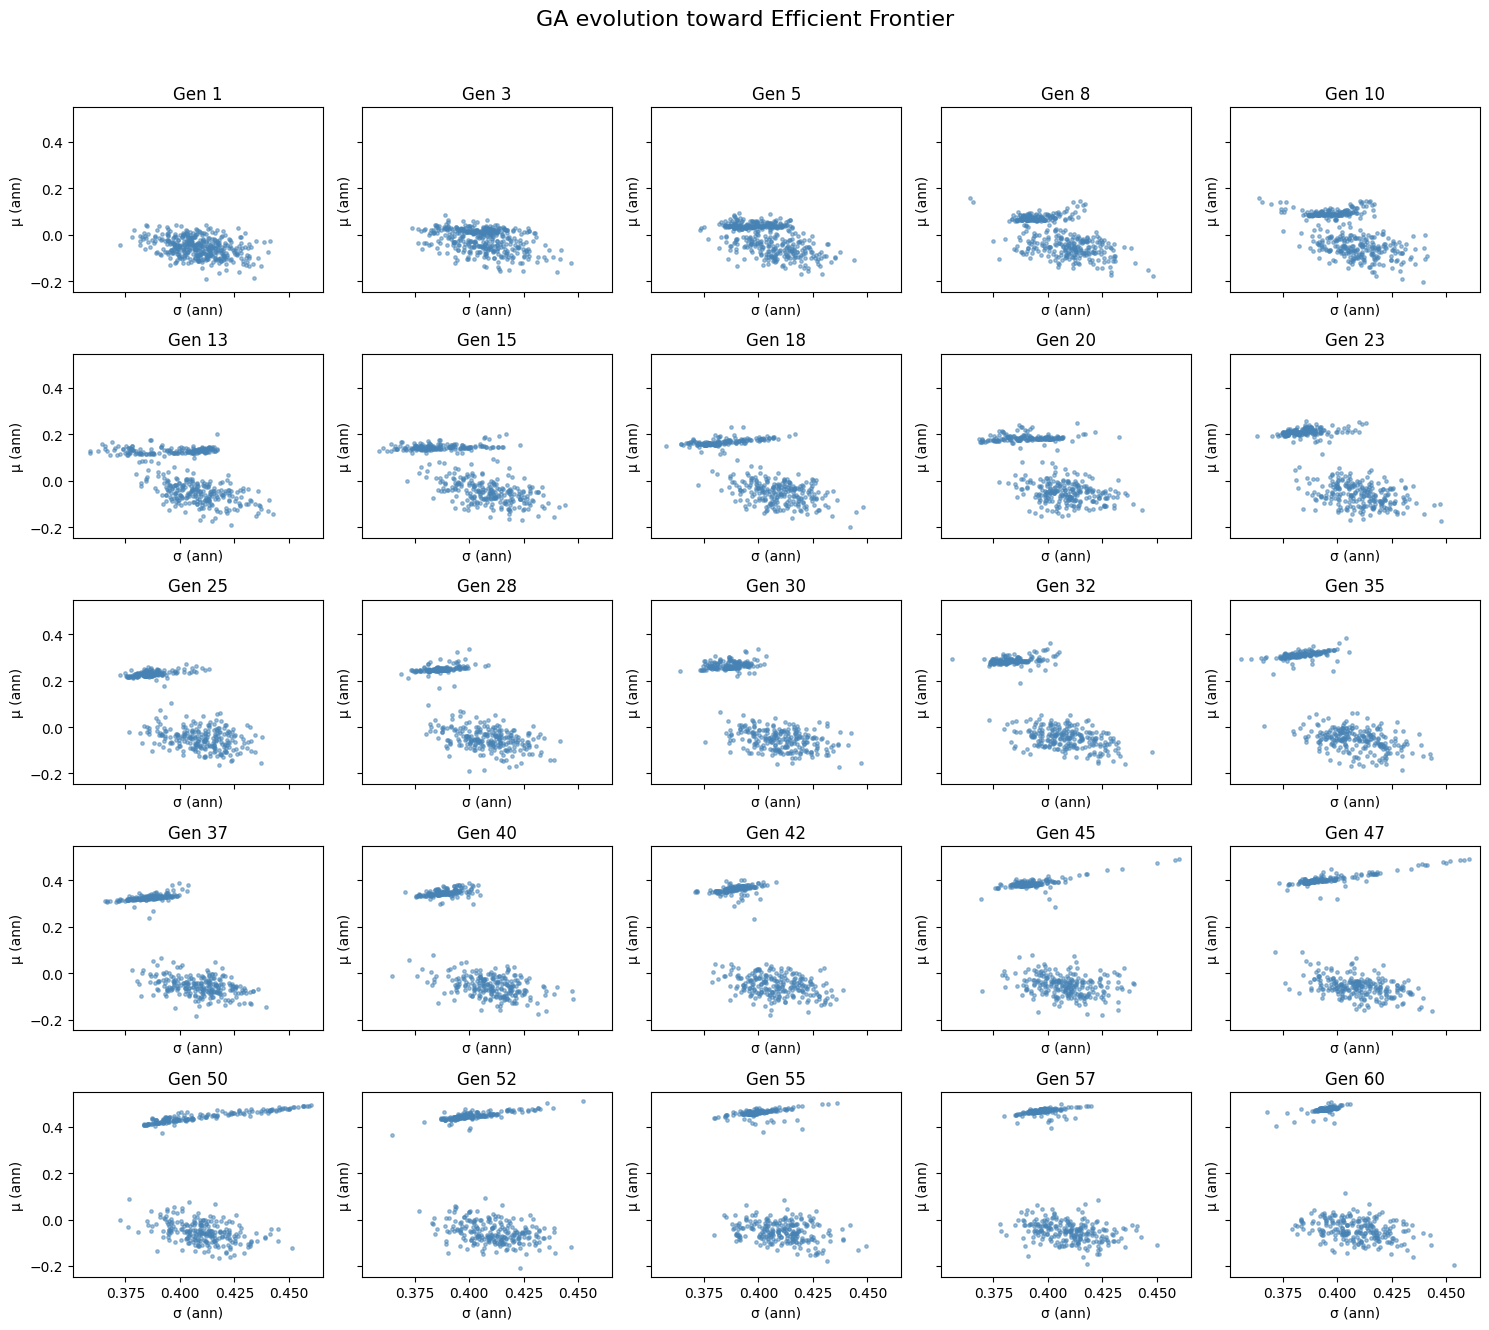

In [9]:
# --------------------------------------------------------------
# 6.1) Инициализация на първото поколение
# --------------------------------------------------------------
population = []
while len(population) < POP_SIZE:
    w = np.random.random(len(tickers))
    w /= w.sum()
    if (w > WEIGHT_CAP).any():
        continue
    population.append(w)

# --------------------------------------------------------------
# 6.2) Еволюция и визуализация
# --------------------------------------------------------------
# fig, axs = plt.subplots(PLOT_X, PLOT_Y, figsize=(15, 13), sharex=True, sharey=True)
# axs = axs.flatten()

fig, axs = plt.subplots(PLOT_Y, PLOT_X, figsize=(15, 13),
                        sharex=True, sharey=True)
axs = axs.flatten()
MAX_PLOTS = PLOT_X * PLOT_Y      # 25

# кои поколения ще рисуваме
if NB_GENERATIONS <= MAX_PLOTS:
    gens_to_plot = list(range(NB_GENERATIONS))
else:
    # равномерни индекси, винаги включва 0
    gens_to_plot = (np.linspace(0, NB_GENERATIONS - 1,
                                num=MAX_PLOTS, dtype=int)
                      .tolist())

print("Ще се визуализират поколения:", gens_to_plot)

for g in range(NB_GENERATIONS):
    # ── статистика за текущото поколение ───────────────────────
    res = np.zeros((2, POP_SIZE))            # σ, μ  (годишни)
    for i, w in enumerate(population):
        mu_bar  = w @ means_bar
        sig_bar = np.sqrt(w @ cov_bar @ w)
        res[1, i] = mu_bar  * PERIODS_PER_YEAR
        res[0, i] = sig_bar * np.sqrt(PERIODS_PER_YEAR)

    # ── чертаем само ако g e в списъка ──────────────────────────
    if g in gens_to_plot:
        plot_idx = gens_to_plot.index(g)     # 0 … 24
        ax = axs[plot_idx]
        ax.scatter(res[0], res[1], s=6, alpha=0.5, c='steelblue')
        ax.set_title(f'Gen {g+1}')
        ax.set_xlabel('σ (ann)')
        ax.set_ylabel('μ (ann)')

    # ── еволюираме към следващо поколение ───────────────────────
    population = next_generation(population)

plt.suptitle('GA evolution toward Efficient Frontier', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [10]:
TOP_N = 20        # how many best portfolios you want to list

def ann_stats(w: np.ndarray) -> tuple[float, float, float]:
    mu_bar  = w @ means_bar
    sig_bar = np.sqrt(w @ cov_bar @ w)
    mu_ann  = mu_bar  * PERIODS_PER_YEAR
    sig_ann = sig_bar * np.sqrt(PERIODS_PER_YEAR)
    sharpe  = (mu_ann - RISK_FREE) / sig_ann
    return mu_ann, sig_ann, sharpe

# 1) take the best TOP_N by Sharpe
best_pop = sorted(population, key=fitness, reverse=True)[:TOP_N]

# 2) build one combined table
records = []
for rank, w in enumerate(best_pop, 1):
    mu, sig, shp = ann_stats(w)
    rec = {
        'Rank'      : rank,
        'Annual μ'  : round(mu, 4),
        'Annual σ'  : round(sig, 4),
        'Sharpe'    : round(shp, 3)
    }
    # add the weights, rounded to 3 dp
    rec.update({tkr: round(w[i], 3) for i, tkr in enumerate(tickers)})
    records.append(rec)

top_df = (pd.DataFrame(records)
            .set_index('Rank')
            .sort_index())

display(top_df)


,Annual μ,Annual σ,Sharpe,ADA,ALGO,ANKR,ATOM,BAT,BNB,BTC,...,VET,WAN,WAVES,WIN,XLM,XMR,XRP,ZEC,ZIL,ZRX
Rank,,,,,,,,,,,,,,,,,,,,,
1,0.5049,0.3970,1.272,0.004,0.006,0.006,0.003,0.008,0.005,0.012,...,0.013,0.022,0.012,0.005,0.059,0.048,0.011,0.009,0.005,0.048
2,0.5019,0.3960,1.268,0.005,0.006,0.006,0.003,0.008,0.005,0.012,...,0.013,0.022,0.012,0.005,0.063,0.046,0.011,0.009,0.005,0.048
3,0.4639,0.3680,1.261,0.005,0.006,0.005,0.003,0.008,0.006,0.012,...,0.009,0.023,0.012,0.008,0.064,0.016,0.010,0.009,0.005,0.043
4,0.4978,0.3955,1.259,0.005,0.006,0.006,0.003,0.008,0.006,0.012,...,0.008,0.023,0.012,0.006,0.102,0.019,0.012,0.010,0.005,0.048
5,0.5043,0.4018,1.255,0.005,0.005,0.006,0.003,0.008,0.007,0.013,...,0.008,0.024,0.013,0.006,0.094,0.018,0.012,0.010,0.005,0.047
6,0.4940,0.3952,1.250,0.005,0.005,0.006,0.003,0.008,0.006,0.013,...,0.011,0.023,0.012,0.006,0.077,0.035,0.012,0.010,0.005,0.046
7,0.4950,0.3968,1.248,0.005,0.000,0.006,0.003,0.009,0.007,0.013,...,0.007,0.024,0.013,0.006,0.086,0.024,0.012,0.010,0.005,0.045
8,0.4677,0.3749,1.248,0.005,0.006,0.005,0.003,0.008,0.006,0.012,...,0.009,0.024,0.012,0.008,0.070,0.019,0.011,0.009,0.005,0.044
9,0.4923,0.3946,1.247,0.005,0.005,0.006,0.003,0.008,0.005,0.012,...,0.012,0.022,0.012,0.005,0.063,0.044,0.011,0.009,0.005,0.047


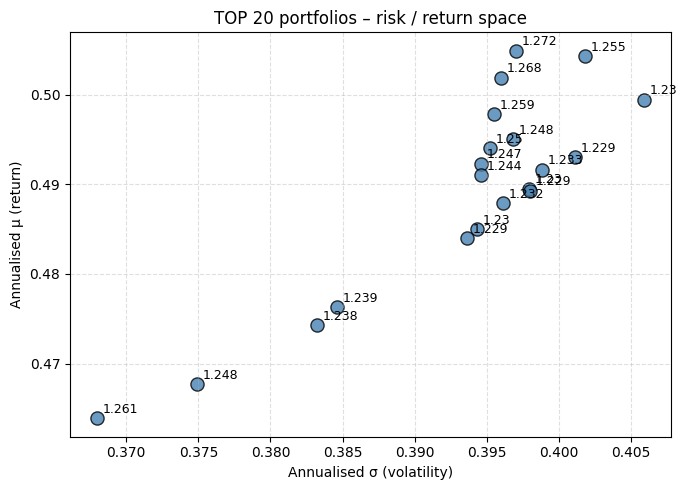

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(top_df['Annual σ'], top_df['Annual μ'],
            s=90, color='steelblue', edgecolors='k', alpha=0.8)

# (по желание) етикет към всяка точка – номерът в класацията
for rank, row in top_df.iterrows():
    plt.annotate(str(row['Sharpe']),
                 (row['Annual σ'], row['Annual μ']),
                 textcoords="offset points",
                 xytext=(4, 4), ha='left', fontsize=9)

plt.xlabel('Annualised σ (volatility)')
plt.ylabel('Annualised μ (return)')
plt.title(f'TOP {len(top_df)} portfolios – risk / return space')
plt.grid(True, ls='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [12]:
best_w = top_df.iloc[0][tickers].to_dict()
best_w

# ПОРТФЕЙЛ С МАКС. SHARPE
#   Год. доходност : 98.79%
#   Год. волатилност : 60.37%

# BTC	ADA	ALGO	ANKR
# Weight	0.5	0.11	0.09	0.3

# ──────────────────────────────────────────────────────────────────────
# ПОРТФЕЙЛ С МИН. ВОЛАТИЛНОСТ
#   Год. доходност : 90.08%
#   Год. волатилност : 57.66%

# BTC	ADA	ALGO	ANKR
# Weight	0.5	0.31	0.12	0.07

{'ADA': 0.004,
 'ALGO': 0.006,
 'ANKR': 0.006,
 'ATOM': 0.003,
 'BAT': 0.008,
 'BNB': 0.005,
 'BTC': 0.012,
 'CELR': 0.006,
 'CHZ': 0.005,
 'COS': 0.007,
 'CVC': 0.057,
 'DASH': 0.005,
 'DENT': 0.008,
 'DOCK': 0.041,
 'DOGE': 0.007,
 'DUSK': 0.007,
 'ENJ': 0.006,
 'EOS': 0.005,
 'ETC': 0.01,
 'ETH': 0.006,
 'FET': 0.007,
 'FTM': 0.004,
 'FUN': 0.028,
 'HOT': 0.011,
 'ICX': 0.003,
 'IOST': 0.01,
 'IOTA': 0.008,
 'KEY': 0.01,
 'LINK': 0.123,
 'LTC': 0.005,
 'MATIC': 0.006,
 'MTL': 0.021,
 'NEO': 0.009,
 'NULS': 0.007,
 'OMG': 0.006,
 'ONE': 0.005,
 'ONG': 0.058,
 'ONT': 0.006,
 'PERL': 0.104,
 'QTUM': 0.009,
 'TFUEL': 0.009,
 'THETA': 0.007,
 'TOMO': 0.044,
 'TRX': 0.042,
 'TUSD': 0.008,
 'USDC': 0.003,
 'VET': 0.013,
 'WAN': 0.022,
 'WAVES': 0.012,
 'WIN': 0.005,
 'XLM': 0.059,
 'XMR': 0.048,
 'XRP': 0.011,
 'ZEC': 0.009,
 'ZIL': 0.005,
 'ZRX': 0.048}

In [19]:
# -*- coding: utf-8 -*-
"""
Backtrader static-weight portfolio back-test
"""
import matplotlib
matplotlib.use('Agg')  
import backtrader as bt
import pandas as pd
from pathlib import Path


# ---------- Параметри ------------------------------------------------------

WEIGHTS = best_w

DATA_DIR       = Path('../resources/data/raw')   # коригирай пътя, ако е нужно
STARTING_CASH  = 100_000
COMMISSION     = 0.001        # 0.1 %
REBALANCE_DAYS = 30         # напр. 30 за месечен ребаланс


# ---------- Стратегия ------------------------------------------------------

class StaticWeightStrategy(bt.Strategy):
    """
    Поддържа фиксирани тегла. Ребалансира:
      • веднъж на първата свещ;
      • през `rebalance_days`, ако е зададено.
    """
    params = (
        ('weights',         None),
        ('rebalance_days',  None),
    )

    def __init__(self):
        self.rebalanced_init = False     # ще ребалансираме при първата свещ
        self.last_rebalance  = None      # календарно следене (ако е нужно)

    # --------------------------------------------------
    def next(self):
        dt = self.datas[0].datetime.date(0)   # текуща дата

        # --- първоначален ребаланс ---------------------------------
        if not self.rebalanced_init:
            self.rebalance()
            self.rebalanced_init = True
            self.last_rebalance  = dt
            return                          # излизаме, за да не удвоим ребаланса

        # --- периодичен ребаланс -----------------------------------
        if self.p.rebalance_days:
            if (dt - self.last_rebalance).days >= self.p.rebalance_days:
                self.rebalance()
                self.last_rebalance = dt

    # --------------------------------------------------
    def rebalance(self):
        """
        Изравняване на позициите към зададените тегла.
        """
        port_value = self.broker.getvalue()
        for data in self.datas:
            w = self.p.weights.get(data._name, 0.0)
            self.order_target_percent(data=data, target=w)

    # --------------------------------------------------
    def log(self, txt, dt=None):
        pass  # махни 'pass' и сложи print, ако искаш лог


# ---------- Четене на CSV → DataFeed --------------------------------------

def load_feed(path: str | Path, name: str,
              from_date=None, to_date=None) -> bt.feeds.PandasData:
    df = (pd.read_csv(path, parse_dates=['timestamp'], index_col='timestamp')
            .sort_index()
            .resample('1D')
            .agg({'open':'first', 'high':'max', 'low':'min',
                  'close':'last',  'volume':'sum'})
            .dropna())
    # филтрираме периода
    if from_date is not None:
        df = df.loc[from_date:]
    if to_date is not None:
        df = df.loc[:to_date]

    print(f'{name}: {len(df):>4} дни | {df.index.min().date()} → {df.index.max().date()}')
    return bt.feeds.PandasData(dataname=df, name=name,
                               timeframe=bt.TimeFrame.Days, compression=1)


# # ---------- Cerebro pipeline ----------------------------------------------

# cerebro = bt.Cerebro()

# # 1) стратегия
# cerebro.addstrategy(
#     StaticWeightStrategy,
#     weights=WEIGHTS,
#     rebalance_days=REBALANCE_DAYS
# )

# # 2) брокер
# cerebro.broker.setcash(STARTING_CASH)
# cerebro.broker.setcommission(commission=COMMISSION)
# #  ➜  BUY/SELL стрелки
# cerebro.addobserver(bt.observers.BuySell)     # 📈 показва мястото на всеки ордер
# cerebro.addobserver(bt.observers.Trades)      # 💬 балони с резултата от сделката
# TEST_FROM = test_prices.index.min().date()
# TEST_TO   = test_prices.index.max().date()

# # 3) данни
# cerebro.adddata(load_feed(DATA_DIR / 'BTC_USDT_1m.csv',  'BTC',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ADA_USDT_1m.csv',   'ADA',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ALGO_USDT_1m.csv',  'ALGO',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ANKR_USDT_1m.csv',  'ANKR',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ATOM_USDT_1m.csv',  'ATOM',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'BAT_USDT_1m.csv',   'BAT',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'BNB_USDT_1m.csv',   'BNB',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'CELR_USDT_1m.csv',  'CELR',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'CHZ_USDT_1m.csv',   'CHZ',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'COS_USDT_1m.csv',   'COS',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'CVC_USDT_1m.csv',   'CVC',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'DASH_USDT_1m.csv',  'DASH',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'DENT_USDT_1m.csv',  'DENT',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'DOCK_USDT_1m.csv',  'DOCK',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'DOGE_USDT_1m.csv',  'DOGE',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'DUSK_USDT_1m.csv',  'DUSK',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ENJ_USDT_1m.csv',   'ENJ',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'EOS_USDT_1m.csv',   'EOS',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ETC_USDT_1m.csv',   'ETC',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ETH_USDT_1m.csv',   'ETH',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'FET_USDT_1m.csv',   'FET',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'FTM_USDT_1m.csv',   'FTM',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'FUN_USDT_1m.csv',   'FUN',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'HOT_USDT_1m.csv',   'HOT',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ICX_USDT_1m.csv',   'ICX',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'IOST_USDT_1m.csv',  'IOST',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'IOTA_USDT_1m.csv',  'IOTA',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'KEY_USDT_1m.csv',   'KEY',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'LINK_USDT_1m.csv',  'LINK',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'LTC_USDT_1m.csv',   'LTC',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'MATIC_USDT_1m.csv', 'MATIC',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'MTL_USDT_1m.csv',   'MTL',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'NEO_USDT_1m.csv',   'NEO',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'NULS_USDT_1m.csv',  'NULS',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'OMG_USDT_1m.csv',   'OMG',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ONE_USDT_1m.csv',   'ONE',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ONG_USDT_1m.csv',   'ONG',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ONT_USDT_1m.csv',   'ONT',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'PERL_USDT_1m.csv',  'PERL',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'QTUM_USDT_1m.csv',  'QTUM',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'TFUEL_USDT_1m.csv', 'TFUEL',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'THETA_USDT_1m.csv', 'THETA',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'TOMO_USDT_1m.csv',  'TOMO',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'TRX_USDT_1m.csv',   'TRX',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'TUSD_USDT_1m.csv',  'TUSD',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'USDC_USDT_1m.csv',  'USDC',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'VET_USDT_1m.csv',   'VET',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'WAN_USDT_1m.csv',   'WAN',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'WAVES_USDT_1m.csv', 'WAVES',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'WIN_USDT_1m.csv',   'WIN',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'XLM_USDT_1m.csv',   'XLM',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'XMR_USDT_1m.csv',   'XMR',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'XRP_USDT_1m.csv',   'XRP',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ZEC_USDT_1m.csv',   'ZEC',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ZIL_USDT_1m.csv',   'ZIL',from_date=TEST_FROM, to_date=TEST_TO))
# cerebro.adddata(load_feed(DATA_DIR / 'ZRX_USDT_1m.csv',   'ZRX',from_date=TEST_FROM, to_date=TEST_TO))

# # ---------- Бектест --------------------------------------------------------

# print(f'\n🟡  Starting Portfolio Value: {cerebro.broker.getvalue():,.2f}')
# cerebro.run()
# print(f'🟢  Final Portfolio Value:    {cerebro.broker.getvalue():,.2f}')
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (20, 20)
# figs = cerebro.plot(iplot=True,                 # True = изкарва директно в cell-а
#              style='candlestick',
#              volume=False,
#              barup='lime', bardown='red')
# fig = figs[0][0]                              # първият (и единствен) прозорец
# fig.savefig('backtest_chart.png', dpi=300)    # => ./backtest_chart.png
# print('Графиката е записана в backtest_chart.png')
# # cerebro.plot(style='candlestick')   # махни коментара за графика

mc_weights = alloc_max.to_dict() 
def backtest_static(weights: dict, label: str):
    cerebro = bt.Cerebro()
    cerebro.addstrategy(StaticWeightStrategy,
                        weights=weights,
                        rebalance_days=REBALANCE_DAYS)

    cerebro.broker.setcash(STARTING_CASH)
    cerebro.broker.setcommission(commission=COMMISSION)

    # ➜ out-of-sample периодът
    TEST_FROM = test_prices.index.min().date()
    TEST_TO   = test_prices.index.max().date()

    for tkr, csv_path in FILEMAP.items():
        cerebro.adddata(
            load_feed(csv_path, tkr,
                      from_date=TEST_FROM,
                      to_date=TEST_TO)
        )

    cerebro.run()
    final_val = cerebro.broker.getvalue()
    cagr = (final_val / STARTING_CASH) ** (365/len(test_prices)) - 1
    print(f'{label:<12s}  Final ${final_val:,.0f}   CAGR {cagr:.2%}')
    return final_val, cagr

In [20]:
# MONTE CARLO CHAMP max sharp
# --- GA портфейл (за контраст) -------------------------
backtest_static(best_w, 'GA-best')

# --- Monte-Carlo max-Sharpe -----------------------------
backtest_static(mc_weights, 'MC-maxSharpe')

# --- Equal weight ---------------------------------------
ew = {t: 1/len(tickers) for t in tickers}
backtest_static(ew, 'Equal-Weight')


ADA:   34 дни | 2023-10-18 → 2023-11-20
ALGO:   34 дни | 2023-10-18 → 2023-11-20
ANKR:   34 дни | 2023-10-18 → 2023-11-20
ATOM:   34 дни | 2023-10-18 → 2023-11-20
BAT:   34 дни | 2023-10-18 → 2023-11-20
BNB:   34 дни | 2023-10-18 → 2023-11-20
BTC:   34 дни | 2023-10-18 → 2023-11-20
CELR:   34 дни | 2023-10-18 → 2023-11-20
CHZ:   34 дни | 2023-10-18 → 2023-11-20
COS:   34 дни | 2023-10-18 → 2023-11-20
CVC:   34 дни | 2023-10-18 → 2023-11-20
DASH:   34 дни | 2023-10-18 → 2023-11-20
DENT:   34 дни | 2023-10-18 → 2023-11-20
DOCK:   34 дни | 2023-10-18 → 2023-11-20
DOGE:   34 дни | 2023-10-18 → 2023-11-20
DUSK:   34 дни | 2023-10-18 → 2023-11-20
ENJ:   34 дни | 2023-10-18 → 2023-11-20
EOS:   34 дни | 2023-10-18 → 2023-11-20
ETC:   34 дни | 2023-10-18 → 2023-11-20
ETH:   34 дни | 2023-10-18 → 2023-11-20
FET:   34 дни | 2023-10-18 → 2023-11-20
FTM:   34 дни | 2023-10-18 → 2023-11-20
FUN:   34 дни | 2023-10-18 → 2023-11-20
HOT:   34 дни | 2023-10-18 → 2023-11-20
ICX:   34 дни | 2023-10-18 → 20

(135123.0012609439, 0.0023344392415922677)